In [126]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)
#city_data.head()
#ride_data.head()
# Combine the data into a single dataset
combined_data = pd.merge(ride_data, city_data, on="city", how="left")

#combined_data = pd.concat([ride_data,city_data],axis=1)
combined_data.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

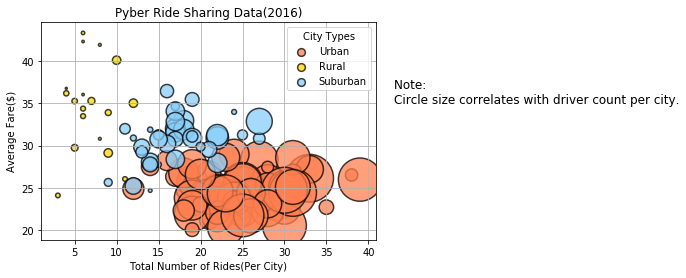

<Figure size 432x288 with 0 Axes>

In [135]:
# Obtain the x and y coordinates for each of the three city types

group_urban = combined_data[combined_data.type=='Urban']
group_rural = combined_data[combined_data.type=='Rural']
group_suburban = combined_data[combined_data.type=='Suburban']

#Urban
x_urban = group_urban.groupby('city').ride_id.count()
y_urban = group_urban.groupby('city').fare.mean()
z_urban = group_urban.groupby('city').driver_count.sum()

#Rural 
x_rural = group_rural.groupby('city').ride_id.count()
y_rural = group_rural.groupby('city').fare.mean()
z_rural = group_rural.groupby('city').driver_count.sum()

#suburban
x_suburban = group_suburban.groupby('city').ride_id.count()
y_suburban = group_suburban.groupby('city').fare.mean()
z_suburban = group_suburban.groupby('city').driver_count.sum()

# Build the scatter plots for each city types
Urban = plt.scatter(x_urban,y_urban,s=z_urban, color='Coral', edgecolors='Black', alpha=0.75,linewidth=1.5, label="Urban")
Rural = plt.scatter(x_rural,y_rural,s=z_rural, color='Gold', edgecolors='Black', alpha=0.75,linewidth=1.5, label="Rural")
Suburban = plt.scatter(x_suburban,y_suburban,s=z_suburban, color='LightSkyBlue', edgecolors='Black', alpha=0.75,linewidth=1.5, 
                       label="Suburban")
plt.grid(True)

# Incorporate the other graph properties
plt.ylabel("Average Fare($)")
plt.xlabel("Total Number of Rides(Per City)")
plt.title("Pyber Ride Sharing Data(2016)")
plt.text(43,35,"Note: \nCircle size correlates with driver count per city.", fontsize = 12)

# Create a legend
legd = plt.legend(loc="best", title= "City Types", frameon=True)

# Incorporate a text label regarding circle size
legd.legendHandles[0]._sizes = [60]
legd.legendHandles[1]._sizes = [60]
legd.legendHandles[2]._sizes = [60]


# Show Figure
plt.show()

# Save Figure
plt.savefig("Pyber_Ride_Sharing_Data.png")








## Total Fares by City Type

In [128]:
fare_sum = combined_data.groupby('type').fare.sum()
fare_sum

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

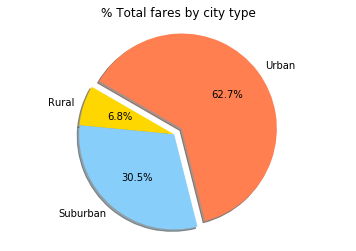

<Figure size 432x288 with 0 Axes>

In [129]:
# Calculate Type Percents
fare_sum = combined_data.groupby('type').fare.sum()
labels=["Rural","Suburban", "Urban"]
colors=["Gold","LightSkyBlue", "Coral"]
explode=[0, 0, 0.1]

# Build Pie Chart
plt.pie(fare_sum, labels=labels, colors=colors, explode=explode, autopct="%1.1F%%",startangle=150, shadow=True)
plt.title("% Total fares by city type")
plt.axis("equal")

# Show Figure
plt.show()

# Save Figure
plt.savefig("Total_Fares_by_City_Type.png")


## Total Rides by City Type

In [130]:
total_rides = combined_data.groupby('type').ride_id.count()
total_rides

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

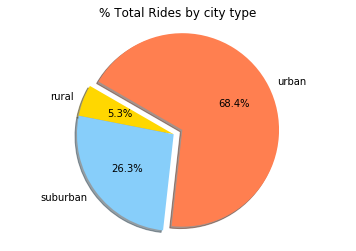

<Figure size 432x288 with 0 Axes>

In [131]:
# Calculate Ride Percents
total_rides = combined_data.groupby('type').ride_id.count()
labels=["rural","suburban", "urban"]
colors=["Gold","LightSkyBlue", "Coral"]
explode=[0, 0, 0.1]

# Build Pie Chart
plt.pie(total_rides,labels=labels,colors=colors, explode=explode, autopct="%1.1F%%",startangle=150, shadow=True)
plt.title("% Total Rides by city type")
plt.axis("equal")

# Show Figure
plt.show()


# Save Figure
plt.savefig("Total_Rides_by_City_Type.png")

## Total Drivers by City Type

In [132]:
total_drivers_per_type= combined_data.groupby('type').driver_count.sum()
total_drivers_per_type

type
Rural         537
Suburban     8570
Urban       59602
Name: driver_count, dtype: int64

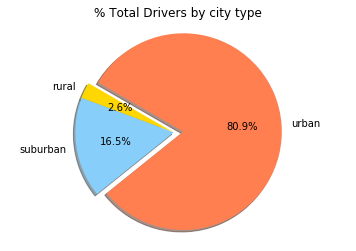

<Figure size 432x288 with 0 Axes>

In [134]:
# Calculate Driver Percents
total_drivers_per_type= city_data.groupby('type').driver_count.sum()
labels=["rural","suburban", "urban"]
colors=["Gold","LightSkyBlue", "Coral"]
explode=[0, 0, 0.1]

# Build Pie Charts
plt.pie(total_drivers_per_type,labels=labels,colors=colors, explode=explode, autopct="%1.1F%%",startangle=150, shadow=True)
plt.title("% Total Drivers by city type")
plt.axis("equal")

# Show Figure
plt.show()

# Save Figure
plt.savefig("Total_Driver_by_City_Type.png")